### Exercise 1

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import random

def get_column(data, index):
    result = [x[index] for x in data]
    return result

def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()

    # get tv (index=0)
    tv_data = get_column(data, 0)

    # get radio (index=1)
    radio_data = get_column(data, 1)

    # get newspaper (index=2)
    newspaper_data = get_column(data, 2)

    # get sales (index=3)
    sales_data = get_column(data, 3)

    # building X input  and y output for training
    X = [tv_data, radio_data, newspaper_data]
    y = sales_data
    return X,y

#Question 1:
X,y = prepare_data('advertising.csv')
list = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print(list)

[624.1, 175.10000000000002, 300.5, 78.9]


### Exercise 2

In [76]:
# def initialize_params():
#     w1 = random.gauss(mu = 0.0, sigma = 0.01)
#     w2 = random.gauss(mu = 0.0, sigma = 0.01)
#     w3 = random.gauss(mu = 0.0, sigma = 0.01)
#     b = 0
#     return w1, w2, w3, b

def initialize_params():
    w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)
    return w1, w2, w3, b

In [77]:
def predict(x1, x2, x3, w1, w2, w3, b):
    y_hat = x1*w1 + x2*w2 + x3*w3 + b
    return y_hat

#Question 2:
y_p = predict(x1 = 1, x2 =1, x3=1, w1=0, w2=0.5, w3=0, b=0.5)
print(y_p)

1.0


In [78]:
def compute_loss_mse(y_hat, y):
    loss = (y_hat - y)**2
    return loss

#Question 3:
l = compute_loss_mse(y_hat=1, y=0.5)
print(l)

0.25


In [79]:
# compute gradient
def compute_gradient_wi(xi, y, y_hat):
    dl_dwi = 2*(y_hat - y)*xi
    return dl_dwi 

def compute_gradient_b(y, y_hat):
    dl_db = 2*(y_hat - y)
    return dl_db

#Question 4:
g_wi = compute_gradient_wi(xi=1.0, y=1.0, y_hat=0.5)
print(g_wi)

-1.0


In [80]:
#Question 5:
g_b =  compute_gradient_b(y=2.0, y_hat=0.5)
print(g_b)

-3.0


In [81]:
# update weights
def update_weight_wi(wi, dl_dwi, lr):
    wi -= dl_dwi*lr
    return wi
    
def update_weight_b(b, dl_db, lr):    
    b -= dl_db*lr
    return b

In [82]:
#Question 6:
after_wi = update_weight_wi(wi=1.0, dl_dwi=-0.5, lr = 1e-5)
print(after_wi)

1.000005


In [83]:
#Question 7:
after_b = update_weight_b(b=0.5, dl_db=-1.0, lr = 1e-5)
print(after_b)    

0.50001


In [84]:
def implement_linear_regression(X_data, y_data, epoch_max = 50,lr = 1e-5):
  losses = []

  w1, w2, w3, b = initialize_params()
 
  N = len(y_data)
  for epoch in range(epoch_max):
      for i in range(N):
          # get a sample
          x1 = X_data[0][i]
          x2 = X_data[1][i]
          x3 = X_data[2][i]

          y  = y_data[i]

          # print(y)
          # compute output 
          y_hat = predict(x1, x2, x3, w1, w2, w3, b)
          
          # compute loss
          loss = compute_loss_mse(y, y_hat)

          # compute gradient w1, w2, w3, b
          dl_dw1 = compute_gradient_wi(x1, y, y_hat)
          dl_dw2 = compute_gradient_wi(x2, y, y_hat)
          dl_dw3 = compute_gradient_wi(x3, y, y_hat)
          dl_db  = compute_gradient_b(y, y_hat)

          # update parameters
          w1 = update_weight_wi(w1, dl_dw1, lr)
          w2 = update_weight_wi(w2, dl_dw2, lr)
          w3 = update_weight_wi(w3, dl_dw3, lr)
          b  = update_weight_b(b, dl_db, lr)

          # logging
          losses.append(loss) 
  return (w1,w2,w3,b, losses)

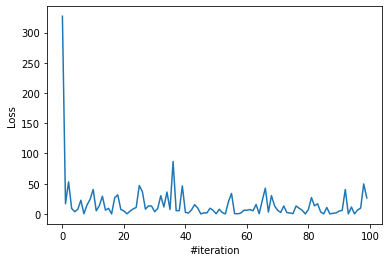

In [85]:
X,y = prepare_data('advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression(X,y)
plt.plot(losses[:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

In [86]:
#Question 8:
X,y = prepare_data('advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression(X,y)
print(w1,w2,w3)

0.07405984066396477 0.15917360263437663 0.017561197559948935


In [87]:
#Question 9:
# given new data
tv = 19.2
radio = 35.9 
newspaper = 51.3

X,y = prepare_data('advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression(X,y)
sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f'predicted sales is {sales}')

predicted sales is 8.176413319549823


In [88]:
def implement_linear_regression_nsamples(X_data, y_data, epoch_max = 1000,lr = 1e-5):
    losses = []

    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):
        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total  = 0.0

        for i in range(N):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]

            y  = y_data[i]

            # print(y)
            # compute output 
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)
            
            # compute loss 
            loss = compute_loss_mse(y, y_hat)

            # accumulate loss to total loss
            loss_total += loss

            # compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db  = compute_gradient_b(y, y_hat)

            # accumulate gradient w1, w2, w3, b
            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db

        # (after processing N samples) - update parameters
        w1 = update_weight_wi(w1, dw1_total/N, lr)
        w2 = update_weight_wi(w2, dw2_total/N, lr)
        w3 = update_weight_wi(w3, dw3_total/N, lr)
        b = update_weight_wi(w1, db_total/N, lr)

        # logging
        losses.append(loss_total/N) 
    return (w1,w2,w3,b, losses)

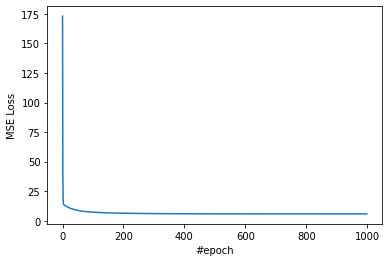

In [89]:
X,y = prepare_data('advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression_nsamples(X,y,1000)
plt.plot(losses)
plt.xlabel("#epoch")
plt.ylabel("MSE Loss")
plt.show()

In [90]:
#Question 11:
X,y = prepare_data('advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression_nsamples(X,y,1000,lr=1e-5)
print(w1,w2,w3)

0.06697150716540733 0.15695300899717887 0.02930776931729244


In [91]:
def prepare_data(file_name_dataset):
  data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()

  # get tv (index=0)
  tv_data = get_column(data, 0)

  # get radio (index=1)
  radio_data = get_column(data, 1)

  # get newspaper (index=2)
  newspaper_data = get_column(data, 2)

  # get sales (index=3)
  sales_data = get_column(data, 3)

  # building X input  and y output for training
  #Create list of features for input
  X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
  y = sales_data
  return X,y

In [92]:
# compute gradient
def compute_gradient_w(X_features, y, y_hat):
    dl_dweights = [compute_gradient_wi(x, y, y_hat) for x in X_features]
    return dl_dweights 

# update weights
def update_weight(weights, dl_dweights, lr):
    for w, dl_dw in zip(weights, dl_dweights):
        w -= dl_dw*lr
    return weights    

def predict(X_features, weights):
    return sum([x*w for x,w in zip(X_features, weights)])

def compute_loss(y, y_hat):
    return (y-y_hat)**2

In [93]:
def implement_linear_regression(X_feature, y_ouput, epoch_max = 50,lr = 1e-5):

    losses = []
    weights = initialize_params()
    N = len(y_ouput)
    for epoch in range(epoch_max):
        print("epoch", epoch)
        for i in range(N):
            # get a sample - row i     
            features_i = X_feature[i]
            y = y_ouput[i]
            
            # compute output 
            y_hat = predict(features_i, weights)

            # compute loss
            loss = compute_loss(y, y_hat)

            # compute gradient w1, w2, w3, b
            dl_dweights = compute_gradient_w(features_i, y, y_hat)

            # update parameters
            weights = update_weight(weights, dl_dweights, lr)

            # logging
            losses.append(loss) 
    return weights, losses

epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19
epoch 20
epoch 21
epoch 22
epoch 23
epoch 24
epoch 25
epoch 26
epoch 27
epoch 28
epoch 29
epoch 30
epoch 31
epoch 32
epoch 33
epoch 34
epoch 35
epoch 36
epoch 37
epoch 38
epoch 39
epoch 40
epoch 41
epoch 42
epoch 43
epoch 44
epoch 45
epoch 46
epoch 47
epoch 48
epoch 49


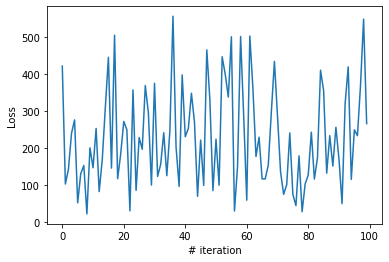

In [94]:
X, y = prepare_data('advertising.csv')
W, L = implement_linear_regression(X, y)
plt.plot(L[0:100])
plt.xlabel("# iteration")
plt.ylabel("Loss")
plt.show()

In [95]:
#Question 12:
X,y = prepare_data('advertising.csv')
W,L = implement_linear_regression(X,y)
# Print loss value at interation 9999
print(L[9999])

epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19
epoch 20
epoch 21
epoch 22
epoch 23
epoch 24
epoch 25
epoch 26
epoch 27
epoch 28
epoch 29
epoch 30
epoch 31
epoch 32
epoch 33
epoch 34
epoch 35
epoch 36
epoch 37
epoch 38
epoch 39
epoch 40
epoch 41
epoch 42
epoch 43
epoch 44
epoch 45
epoch 46
epoch 47
epoch 48
epoch 49
280.89647210273785
